In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import ensemble
from sklearn import gaussian_process
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import svm
from sklearn import tree
from sklearn import discriminant_analysis
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

import xgboost as xgb
from xgboost import XGBClassifier
MLA = [
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    gaussian_process.GaussianProcessClassifier(),
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(), 
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    neighbors.KNeighborsClassifier(), 
    svm.SVC(probability=True),
    #svm.NuSVC(probability=True),
    svm.LinearSVC(), 
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    XGBClassifier()
       ] 

import warnings
warnings.filterwarnings('ignore')

D:\Python3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\Python3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
D:\Python3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
D:\Python3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


## Read training data

In [2]:
df = pd.read_csv('E:/Experiments/PeilunHan/LVNC/radiomics/run-new/run-1223/combine-train.csv',encoding='gbk')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Group                                   76 non-null     int64  
 1   End                                     76 non-null     int64  
 2   ID                                      76 non-null     int64  
 3   检查时间                                    76 non-null     object 
 4   original_shape_Flatness                 76 non-null     float64
 5   original_shape_Elongation               76 non-null     float64
 6   original_glcm_ClusterShade              76 non-null     float64
 7   original_firstorder_10Percentile        76 non-null     float64
 8   original_firstorder_Minimum             76 non-null     float64
 9   original_shape_Maximum2DDiameterColumn  76 non-null     float64
 10  original_glszm_SmallAreaEmphasis        76 non-null     float64


In [3]:
df.head()

,Group,End,ID,检查时间,original_shape_Flatness,original_shape_Elongation,original_glcm_ClusterShade,original_firstorder_10Percentile,original_firstorder_Minimum,original_shape_Maximum2DDiameterColumn,...,Age,CLVMI,LVEDV,LVEF,RVNC,NCC,Beta,BMI,Rvabnormalities,Noseg
0,1,0,151,2012/1/17,0.089947,0.956562,1523.214082,-8.521614,-82.271643,77.447115,...,15,61.50,189.88,61.6,1,4.72,0,22.68,0,13
1,1,0,23,2013/5/31,0.092819,0.963362,28835.622890,-14.571660,-87.111764,93.867462,...,45,68.36,298.60,20.9,0,3.48,0,25.71,1,11
2,1,0,152,2013/7/5,0.078033,0.951846,2792.368275,-4.293009,-73.745260,90.005555,...,50,56.12,156.80,31.4,0,8.00,0,24.49,1,7
3,1,1,29,2013/10/24,0.088140,0.913976,6464.951013,5.594602,-55.817565,81.464473,...,66,34.37,173.30,33.0,0,11.50,0,21.80,1,11
4,1,0,53,2013/11/26,0.076208,0.980006,20815.069160,40.708389,-77.359506,88.355970,...,22,40.25,183.00,47.8,0,10.90,0,19.38,1,16


In [4]:
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['End']))} 
class_mapping

{0: 0, 1: 1}

In [5]:
from sklearn.preprocessing import LabelEncoder
df['End'] = df['End'].map(class_mapping)
y_train = LabelEncoder().fit_transform(df['End'].values)
X_train = df.iloc[:, 4:28].values
print(y_train.shape)
print(X_train.shape)

(76,)
(76, 24)


In [6]:
feat_labels = df.columns[4:28] 

In [7]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_std = stdsc.fit_transform(X_train)
X_train = X_std
print(X_train.shape)

(76, 24)


## Read test data

In [8]:
df1 = pd.read_csv('E:/Experiments/PeilunHan/LVNC/radiomics/run-new/run-1223/combine-test.csv',encoding='gbk')
class_mapping = {label: idx for idx, label in enumerate(np.unique(df1['End']))}
df1['End'] = df1['End'].map(class_mapping)
y_test = LabelEncoder().fit_transform(df1['End'].values)
X_test = df1.iloc[:, 4:28].values
print(y_test.shape)
print(X_test.shape)
X_test = stdsc.transform(X_test)
print(X_test.shape)

(20,)
(20, 24)
(20, 24)


## All the data

In [9]:
df2 = pd.read_csv('E:/Experiments/PeilunHan/LVNC/radiomics/run-new/run-1223/combine-new.csv',encoding='gbk')
class_mapping = {label: idx for idx, label in enumerate(np.unique(df2['End']))}
df2['End'] = df2['End'].map(class_mapping)
y = LabelEncoder().fit_transform(df2['End'].values)
X = df2.iloc[:, 4:28].values
print(y.shape)
print(X.shape)
X = stdsc.transform(X)
print(X.shape)

(96,)
(96, 24)
(96, 24)


0    75
1    21
Name: End, dtype: int64


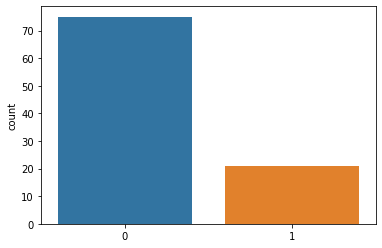

In [10]:
import seaborn as sns
ax = sns.countplot(x=y, data=df2)
print(df2['End'].value_counts())

## Data preprocessing

In [11]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
sm = SMOTE(random_state=11)
X1_train, y1_train = sm.fit_sample(X_train, y_train)

Using TensorFlow backend.


In [12]:
unique, count = np.unique(y1_train, return_counts=True)
y1_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y1_train_smote_value_count

{0: 61, 1: 61}

In [13]:
print(y1_train.shape)
print(X1_train.shape)

(122,)
(122, 24)


In [14]:
new_df = pd.DataFrame(X1_train)
new_df1 = pd.DataFrame(y1_train)
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-1.027529,0.585579,-0.510981,-0.490969,-0.928089,-0.320610,-0.949745,-0.171365,-1.098744,0.194699,...,-1.528278,-0.070421,-0.312902,1.207824,2.309401,0.247548,-0.679366,-0.207948,-1.054093,0.983448
1,-0.889105,0.763761,0.719760,-0.662558,-1.216693,0.795467,0.749838,0.170889,0.770482,-1.115657,...,0.526247,0.189360,0.683888,-0.918600,-0.433013,-0.366856,-0.679366,0.376601,0.948683,0.476722
2,-1.601914,0.461998,-0.453791,-0.371038,-0.419682,0.532977,0.206087,0.799800,-0.542180,0.928641,...,0.868667,-0.274156,-0.616193,-0.370014,-0.433013,1.872744,-0.679366,0.141238,0.948683,-0.536729
3,-1.114670,-0.530350,-0.288298,-0.090609,0.649301,-0.047554,0.936315,-0.667090,0.530234,-0.550875,...,1.964414,-1.097806,-0.464915,-0.286420,-0.433013,3.606947,-0.679366,-0.377718,0.948683,0.476722
4,-1.689914,1.199880,0.358341,0.905277,-0.635190,0.420856,1.341238,-0.387245,2.204919,0.140759,...,-1.048889,-0.875137,-0.375981,0.486825,-0.433013,3.309655,-0.679366,-0.844586,0.948683,1.743537


In [34]:
X0 = X
X1 = X_train
X2 = X1_train
X3 = X_test
y0 = y
y1 = y_train
y2 = y1_train
y3 = y_test

print("the true all data:")
print(X0.shape)
print(y0.shape)
print("the true train data:")
print(X1.shape)
print(y1.shape)
print("the generate train data:")
print(X2.shape)
print(y2.shape)
print("the true test data:")
print(X3.shape)
print(y3.shape)

the true all data:
(96, 24)
(96,)
the true train data:
(76, 24)
(76,)
the generate train data:
(122, 24)
(122,)
the true test data:
(20, 24)
(20,)


In [35]:
# save the data
#data_df = pd.DataFrame(X0)
#writer = pd.ExcelWriter('nn.xlsx')
#data_df.to_excel(writer,'page_1',float_format='%.5f')
#writer.save() 

## Select modeling method

In [17]:
clf1 = LogisticRegression(penalty='l2',C=1, multi_class='auto',solver='liblinear',random_state=1)
clf2 = tree.DecisionTreeClassifier(random_state=1)
clf3 = ensemble.RandomForestClassifier(random_state=1)
clf4 = XGBClassifier(random_state=1)
clf5 = svm.SVC(probability=True, random_state=1)

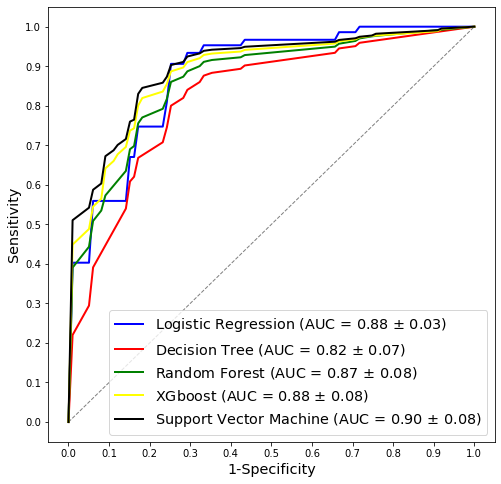

In [19]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import model_selection
from scipy import interp
import matplotlib
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import auc, f1_score, roc_auc_score, roc_curve
from pylab import rcParams

cv = model_selection.ShuffleSplit(n_splits = 4, test_size = 0.2, random_state = 1)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)

for train, test in cv.split(X2, y2):
    probas_ = clf1.fit(X2[train], y2[train]).predict_proba(X2[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y2[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    #optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=tpr, FPR=fpr, threshold=thresholds) ###
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
#optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=mean_tpr, mean_fpr, threshold=thresholds)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',label=r'Logistic Regression (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#############################################################
for train, test in cv.split(X2, y2):
    probas_ = clf2.fit(X2[train], y2[train]).predict_proba(X2[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y2[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.6)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='red',label=r'Decision Tree (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
################################################################

for train, test in cv.split(X2, y2):
    probas_ = clf3.fit(X2[train], y2[train]).predict_proba(X2[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y2[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.6)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='green',label=r'Random Forest (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#################################################################
for train, test in cv.split(X2, y2):
    probas_ = clf4.fit(X2[train], y2[train]).predict_proba(X2[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y2[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.6)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='yellow',linestyle='-',label=r'XGboost (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#################################################################
for train, test in cv.split(X2, y2):
    probas_ = clf5.fit(X2[train], y2[train]).predict_proba(X2[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y2[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.6)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='black',linestyle='-', label=r'Support Vector Machine (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

#################################################################
#plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
#plt.xlim([-0, 1])
#plt.ylim([-0, 1])
plt.xlabel('1-Specificity', fontsize = 'x-large')
plt.ylabel('Sensitivity', fontsize = 'x-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'x-large'
          )
#plt.plot(optimal_point[0], optimal_point[1], marker='o', color='r')
#plt.text(optimal_point[0], optimal_point[1], f'Threshold:{optimal_th:.2f}')

plt.savefig('com-ROC1.jpg',dpi=1200)
plt.show()

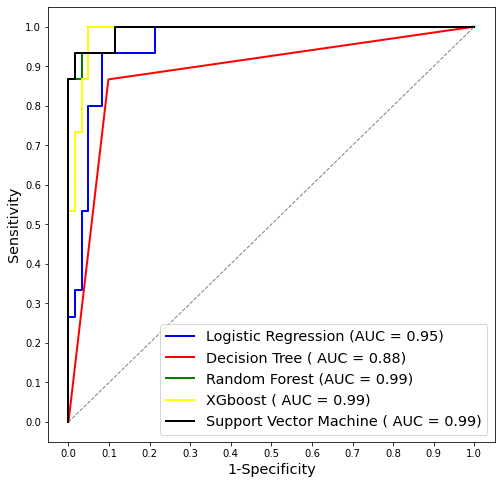

In [20]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))
###################################################################
probas_ = clf1.predict_proba(X1)
fpr, tpr, thresholds = roc_curve(y1, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='b', alpha=1, lw=2, linestyle='-',label='Logistic Regression (AUC = %0.2f)' % roc_auc) 
#plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--',alpha=.6)
###################################################################
probas_ = clf2.predict_proba(X1)
fpr, tpr, thresholds = roc_curve(y1, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='r', alpha=1, lw=2, linestyle='-',label='Decision Tree ( AUC = %0.2f)' % roc_auc) 
###################################################################
probas_ = clf3.predict_proba(X1)
fpr, tpr, thresholds = roc_curve(y1, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='green', alpha=1, lw=2, linestyle='-',label='Random Forest (AUC = %0.2f)' % roc_auc) 
###################################################################
probas_ = clf4.predict_proba(X1)
fpr, tpr, thresholds = roc_curve(y1, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='yellow', alpha=1, lw=2, linestyle='-',label='XGboost ( AUC = %0.2f)' % roc_auc) 
###################################################################
probas_ = clf5.predict_proba(X1)
fpr, tpr, thresholds = roc_curve(y1, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='black', alpha=1, lw=2, linestyle='-',label='Support Vector Machine ( AUC = %0.2f)' % roc_auc) 
###################################################################

plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)
#plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
#plt.xlim([-0, 1])
#plt.ylim([-0, 1])
plt.xlabel('1-Specificity', fontsize = 'x-large')
plt.ylabel('Sensitivity', fontsize = 'x-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'x-large'
          )
#plt.savefig('ROC2.jpg',dpi=1200)
plt.show()

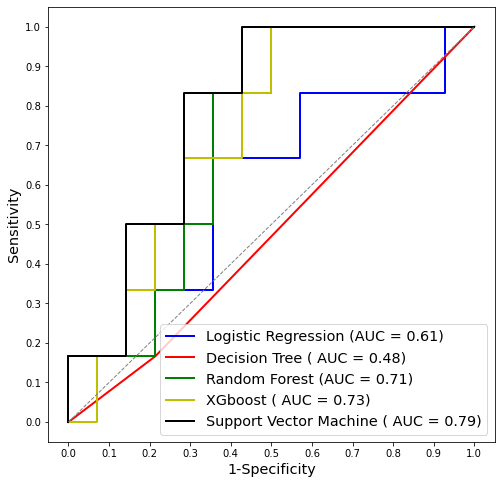

In [21]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))
###################################################################
probas_ = clf1.predict_proba(X3)
fpr, tpr, thresholds = roc_curve(y3, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='b', alpha=1, lw=2, linestyle='-',label='Logistic Regression (AUC = %0.2f)' % roc_auc) 
#plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--',alpha=.6)
###################################################################
probas_ = clf2.predict_proba(X3)
fpr, tpr, thresholds = roc_curve(y3, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='r', alpha=1, lw=2, linestyle='-',label='Decision Tree ( AUC = %0.2f)' % roc_auc) 
###################################################################
probas_ = clf3.predict_proba(X3)
fpr, tpr, thresholds = roc_curve(y3, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='green', alpha=1, lw=2, linestyle='-',label='Random Forest (AUC = %0.2f)' % roc_auc) 
###################################################################
probas_ = clf4.predict_proba(X3)
fpr, tpr, thresholds = roc_curve(y3, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='y', alpha=1, lw=2, linestyle='-',label='XGboost ( AUC = %0.2f)' % roc_auc) 
###################################################################
probas_ = clf5.predict_proba(X3)
fpr, tpr, thresholds = roc_curve(y3, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='black', alpha=1, lw=2, linestyle='-',label='Support Vector Machine ( AUC = %0.2f)' % roc_auc) 

plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)
#plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
#plt.xlim([-0, 1])
#plt.ylim([-0, 1])
plt.xlabel('1-Specificity', fontsize = 'x-large')
plt.ylabel('Sensitivity', fontsize = 'x-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'x-large'
          )
#plt.savefig('B-RFE-ROC3.jpg',dpi=1200)
plt.show()

## Modeling and Test

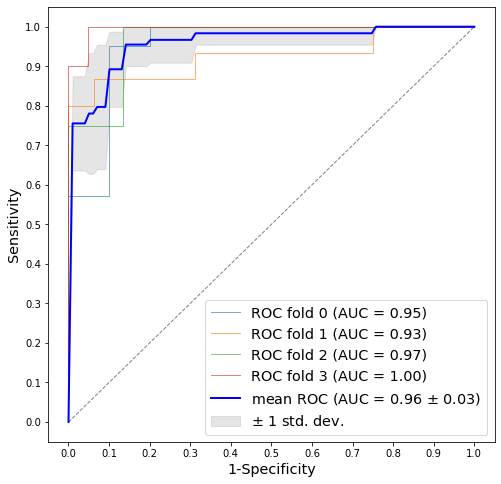

In [23]:
model = svm.SVC(probability=True, random_state=1)

matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
cv = model_selection.ShuffleSplit(n_splits = 4, test_size = 0.25, random_state = 1)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))

for train, test in cv.split(X2, y2):
    probas_ = model.fit(X2[train], y2[train]).predict_proba(X2[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y2[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    #optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=tpr, FPR=fpr, threshold=thresholds) ###
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
#optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=mean_tpr, mean_fpr, threshold=thresholds)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',label=r'mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

plt.xlabel('1-Specificity', fontsize = 'x-large')
plt.ylabel('Sensitivity', fontsize = 'x-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'x-large'
          )
#plt.plot(optimal_point[0], optimal_point[1], marker='o', color='r')
#plt.text(optimal_point[0], optimal_point[1], f'Threshold:{optimal_th:.2f}')

#plt.savefig('com-ROC3.jpg',dpi=1200)
plt.show()

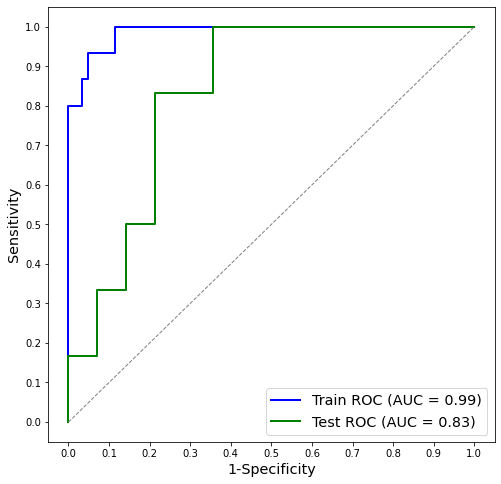

In [24]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))
probas_ = model.predict_proba(X1)
fpr, tpr, thresholds = roc_curve(y1, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='blue', alpha=1, lw=2, linestyle='-',label='Train ROC (AUC = %0.2f)' % roc_auc) 
#plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--',alpha=.6)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)

probas_ = model.predict_proba(X3)
fpr, tpr, thresholds = roc_curve(y3, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='green', alpha=1, lw=2, linestyle='-',label='Test ROC (AUC = %0.2f)' % roc_auc) 
#plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--',alpha=.6)
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)

#plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
#plt.xlim([-0, 1])
#plt.ylim([-0, 1])
plt.xlabel('1-Specificity', fontsize = 'x-large')
plt.ylabel('Sensitivity', fontsize = 'x-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'x-large'
          )
#plt.savefig('com-ROC4.jpg',dpi=1200)
plt.show()

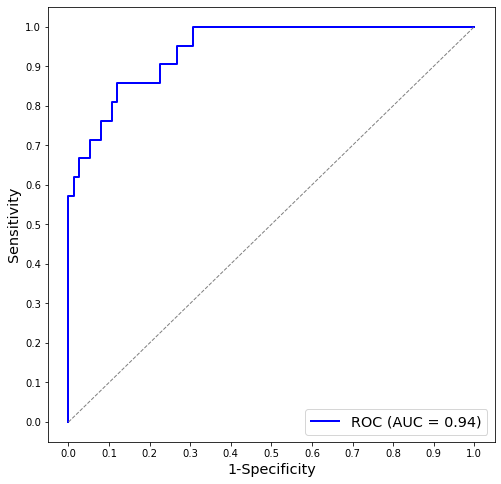

In [33]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))
probas_ = model.predict_proba(X0)
fpr, tpr, thresholds = roc_curve(y0, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='blue', alpha=1, lw=2, linestyle='-',label='ROC (AUC = %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)
plt.xlabel('1-Specificity', fontsize = 'x-large')
plt.ylabel('Sensitivity', fontsize = 'x-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'x-large'
          )
#plt.savefig('ROC4-new.jpg',dpi=1200)
plt.show()

In [26]:
Y1_Pred = model.predict(X1)
pd.crosstab(pd.Series(Y1_Pred, name = 'Predicted'), 
            pd.Series(df['End'], name = 'Actual'))

Actual,0,1
Predicted,,
0,55,1
1,6,14


In [27]:
Y3_Pred = model.predict(X3)
pd.crosstab(pd.Series(Y3_Pred, name = 'Predicted'), 
            pd.Series(df1['End'], name = 'Actual'))

Actual,0,1
Predicted,,
0,12,3
1,2,3


In [28]:
Y0_Pred = model.predict(X0)
pd.crosstab(pd.Series(Y0_Pred, name = 'Predicted'), 
            pd.Series(df2['End'], name = 'Actual'))

Actual,0,1
Predicted,,
0,67,4
1,8,17


In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

print("Accuracy = " , accuracy_score(y1, Y1_Pred))
print("Precision = " ,precision_score(y1, Y1_Pred))
print("Recall = " ,recall_score(y1, Y1_Pred))
print("F1 Score = " ,f1_score(y1, Y1_Pred))

Accuracy =  0.9078947368421053
Precision =  0.7
Recall =  0.9333333333333333
F1 Score =  0.8


In [30]:
print("Accuracy = " , accuracy_score(y3, Y3_Pred))
print("Precision = " ,precision_score(y3, Y3_Pred))
print("Recall = " ,recall_score(y3, Y3_Pred))
print("F1 Score = " ,f1_score(y3, Y3_Pred))

Accuracy =  0.75
Precision =  0.6
Recall =  0.5
F1 Score =  0.5454545454545454


In [31]:
print("Accuracy = " , accuracy_score(y0, Y0_Pred))
print("Precision = " ,precision_score(y0, Y0_Pred))
print("Recall = " ,recall_score(y0, Y0_Pred))
print("F1 Score = " ,f1_score(y0, Y0_Pred))

Accuracy =  0.875
Precision =  0.68
Recall =  0.8095238095238095
F1 Score =  0.7391304347826089


In [32]:
predictions = model.predict_proba(X0)
predictions

array([[0.97994445, 0.02005555],
       [0.43466638, 0.56533362],
       [0.21493107, 0.78506893],
       [0.10673822, 0.89326178],
       [0.81525267, 0.18474733],
       [0.73733299, 0.26266701],
       [0.99289393, 0.00710607],
       [0.1103694 , 0.8896306 ],
       [0.97995558, 0.02004442],
       [0.5       , 0.5       ],
       [0.09097183, 0.90902817],
       [0.97994004, 0.02005996],
       [0.97995445, 0.02004555],
       [0.61313251, 0.38686749],
       [0.98140665, 0.01859335],
       [0.97993886, 0.02006114],
       [0.0663211 , 0.9336789 ],
       [0.98931597, 0.01068403],
       [0.97997103, 0.02002897],
       [0.0658171 , 0.9341829 ],
       [0.92347932, 0.07652068],
       [0.95498772, 0.04501228],
       [0.35263698, 0.64736302],
       [0.08449822, 0.91550178],
       [0.97995262, 0.02004738],
       [0.94170124, 0.05829876],
       [0.95491569, 0.04508431],
       [0.77469712, 0.22530288],
       [0.41623406, 0.58376594],
       [0.07204661, 0.92795339],
       [0.

In [36]:
pre_df = pd.DataFrame(predictions)
writer = pd.ExcelWriter('combine_pre.xlsx')
pre_df.to_excel(writer,'page_1',float_format='%.5f')
writer.save() 